In [26]:
import os
import warnings
import tensorflow.keras as keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from PIL import Image
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten

In [24]:
warnings.filterwarnings('ignore')
np.random.seed(0)
tf.random.set_seed(0)

In [6]:
dt = './data1/'
os.listdir(dt)

['Meta', 'Meta.csv', 'Test', 'Test.csv', 'Train', 'Train.csv']

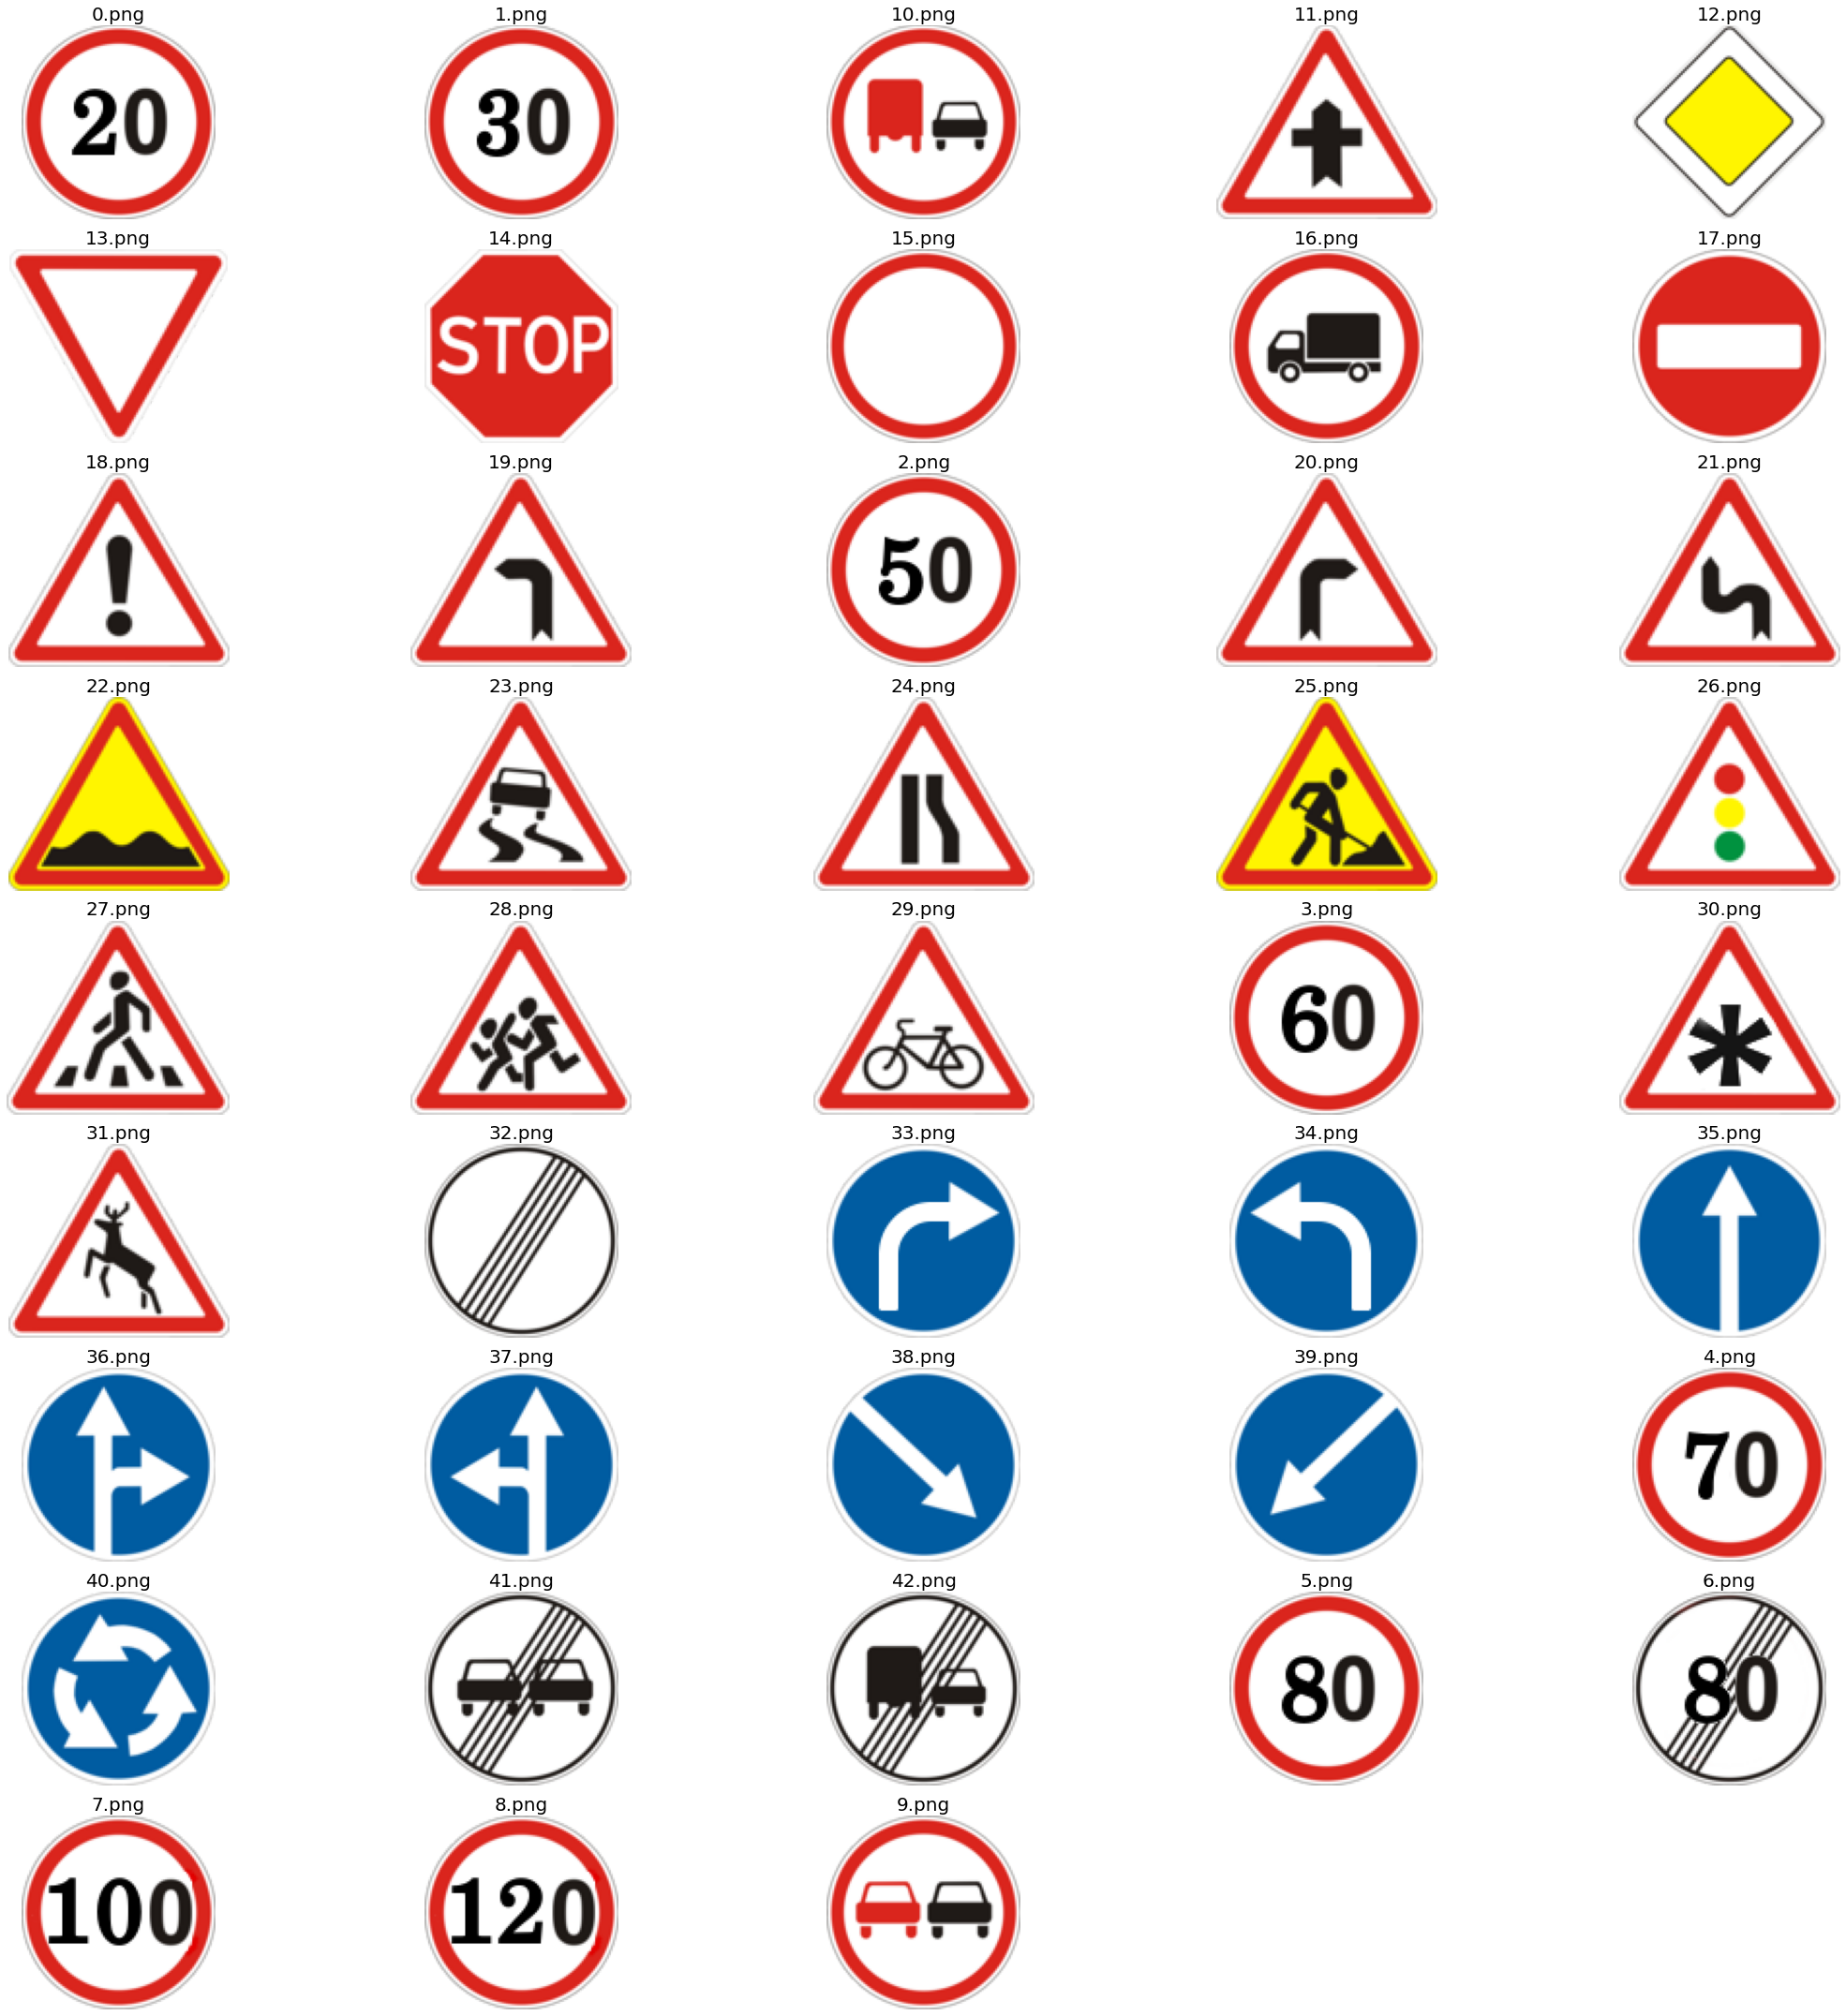

In [7]:
plt.figure(figsize=(30,30))
for i, file in enumerate(meta):
    img = Image.open(dt+'Meta/'+file)
    ax = plt.subplot(9,5,i+1)
    ax.imshow(img)
    ax.set_title(file, size=20)
    plt.axis('off')
plt.tight_layout()

In [8]:
classs = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [12]:
train_df = pd.read_csv(dt+'Train.csv')
train_df.head(20)

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png
5,31,27,6,5,26,22,20,Train/20/00020_00000_00005.png
6,31,28,6,6,26,23,20,Train/20/00020_00000_00006.png
7,31,28,6,6,26,23,20,Train/20/00020_00000_00007.png
8,31,29,5,6,26,24,20,Train/20/00020_00000_00008.png
9,34,32,6,6,29,26,20,Train/20/00020_00000_00009.png


In [15]:
x_train=[]
for i in train_df.Path:
    img_ = Image.open(dt+i)       
    img_= img_.resize((50,50))     
    x_train.append(np.array(img_)) 
y_train= np.array(train_df.ClassId)
x_train= np.array(x_train)
print(x_train.shape)
print(y_train.shape)

(39209, 50, 50, 3)
(39209,)


In [18]:
test_df = pd.read_csv(dt+'Test.csv')

In [19]:
test_df.head(10)

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png
5,52,56,5,5,47,51,38,Test/00005.png
6,147,130,12,12,135,119,18,Test/00006.png
7,32,33,5,5,26,28,12,Test/00007.png
8,45,50,6,5,40,45,25,Test/00008.png
9,81,86,7,7,74,79,35,Test/00009.png


In [20]:
x_test=[]
for i in test_df.Path:
    img = Image.open(dt+i)
    img = img.resize((50,50))
    x_test.append(np.array(img))
y_test= np.array(test_df.ClassId)
x_test= np.array(x_test)
print(x_test.shape)
print(y_test.shape)

(12630, 50, 50, 3)
(12630,)


Dangerous curve right


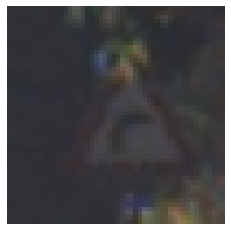

In [22]:
print(classs[y_train[6]])
plt.imshow(x_train[6])
plt.axis('off')
plt.show()

In [25]:
# Normalization
X_train =x_train/255
X_test =x_test/255
# One Hot encoding
Y_train = keras.utils.to_categorical(y_train)
Y_test = keras.utils.to_categorical(y_test)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_valid.shape)
print(Y_train.shape)
print(Y_valid.shape)

(31367, 50, 50, 3)
(7842, 50, 50, 3)
(31367, 43)
(7842, 43)


In [39]:
model = keras.models.Sequential()
model.add(Conv2D(filters=32, kernel_size= (5,5), strides=2, activation='relu', padding='same', input_shape=(50,50,3)))
model.add(Conv2D(filters=32, kernel_size=(5,5), strides=2, activation='relu', padding='same'))
model.add(MaxPool2D((2,2), padding='valid'))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5,5), strides=2, activation='relu', padding='same'))
model.add(Conv2D(filters=64, kernel_size=(5,5), strides=2, activation='relu', padding='same'))
model.add(MaxPool2D((2,2), padding='valid'))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(300, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(43, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 25, 25, 32)        2432      
                                                                 
 conv2d_9 (Conv2D)           (None, 13, 13, 32)        25632     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 6, 6, 32)          0         
                                                                 
 conv2d_10 (Conv2D)          (None, 3, 3, 64)          51264     
                                                                 
 conv2d_11 (Conv2D)          (None, 2, 2, 64)          102464    
                                                      

In [40]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics = ['accuracy'])
earlystop = keras.callbacks.EarlyStopping(patience=5, restore_best_weights =True)
model_history = model.fit(X_train,Y_train, epochs=200,
                         validation_data=(X_valid,Y_valid),
                         callbacks=[earlystop])

Epoch 1/200
981/981 [==============================] - 43s 43ms/step - loss: 3.5894 - accuracy: 0.0643 - val_loss: 3.4814 - val_accuracy: 0.0993
Epoch 2/200
981/981 [==============================] - 41s 42ms/step - loss: 3.4159 - accuracy: 0.1031 - val_loss: 3.2370 - val_accuracy: 0.1568
Epoch 3/200
981/981 [==============================] - 40s 41ms/step - loss: 2.7723 - accuracy: 0.2476 - val_loss: 2.3678 - val_accuracy: 0.3211
Epoch 4/200
981/981 [==============================] - 41s 42ms/step - loss: 1.5897 - accuracy: 0.5228 - val_loss: 1.3745 - val_accuracy: 0.6112
Epoch 5/200
981/981 [==============================] - 41s 42ms/step - loss: 1.0085 - accuracy: 0.6851 - val_loss: 0.9453 - val_accuracy: 0.6920
Epoch 6/200
981/981 [==============================] - 41s 42ms/step - loss: 0.7528 - accuracy: 0.7612 - val_loss: 0.4234 - val_accuracy: 0.8749
Epoch 7/200
981/981 [==============================] - 42s 43ms/step - loss: 0.6005 - accuracy: 0.8095 - val_loss: 0.7581 - val_ac

<AxesSubplot:>

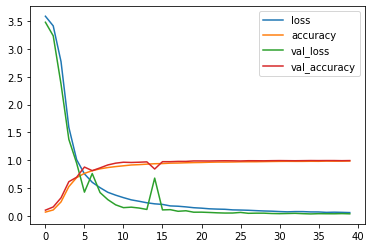

In [41]:
pd.DataFrame(model_history.history).plot()

In [43]:
loss, accuracy = model.evaluate(X_test,Y_test)
print(f'Loss = {loss:.2f}\naccuracy = {accuracy*100:.2f}%')

395/395 [==============================] - 4s 11ms/step - loss: 0.3762 - accuracy: 0.9210
Loss = 0.38
accuracy = 92.10%


In [45]:
pr= model.predict(X_test)
pred= np.argmax(pr, axis=-1)

395/395 [==============================] - 4s 10ms/step


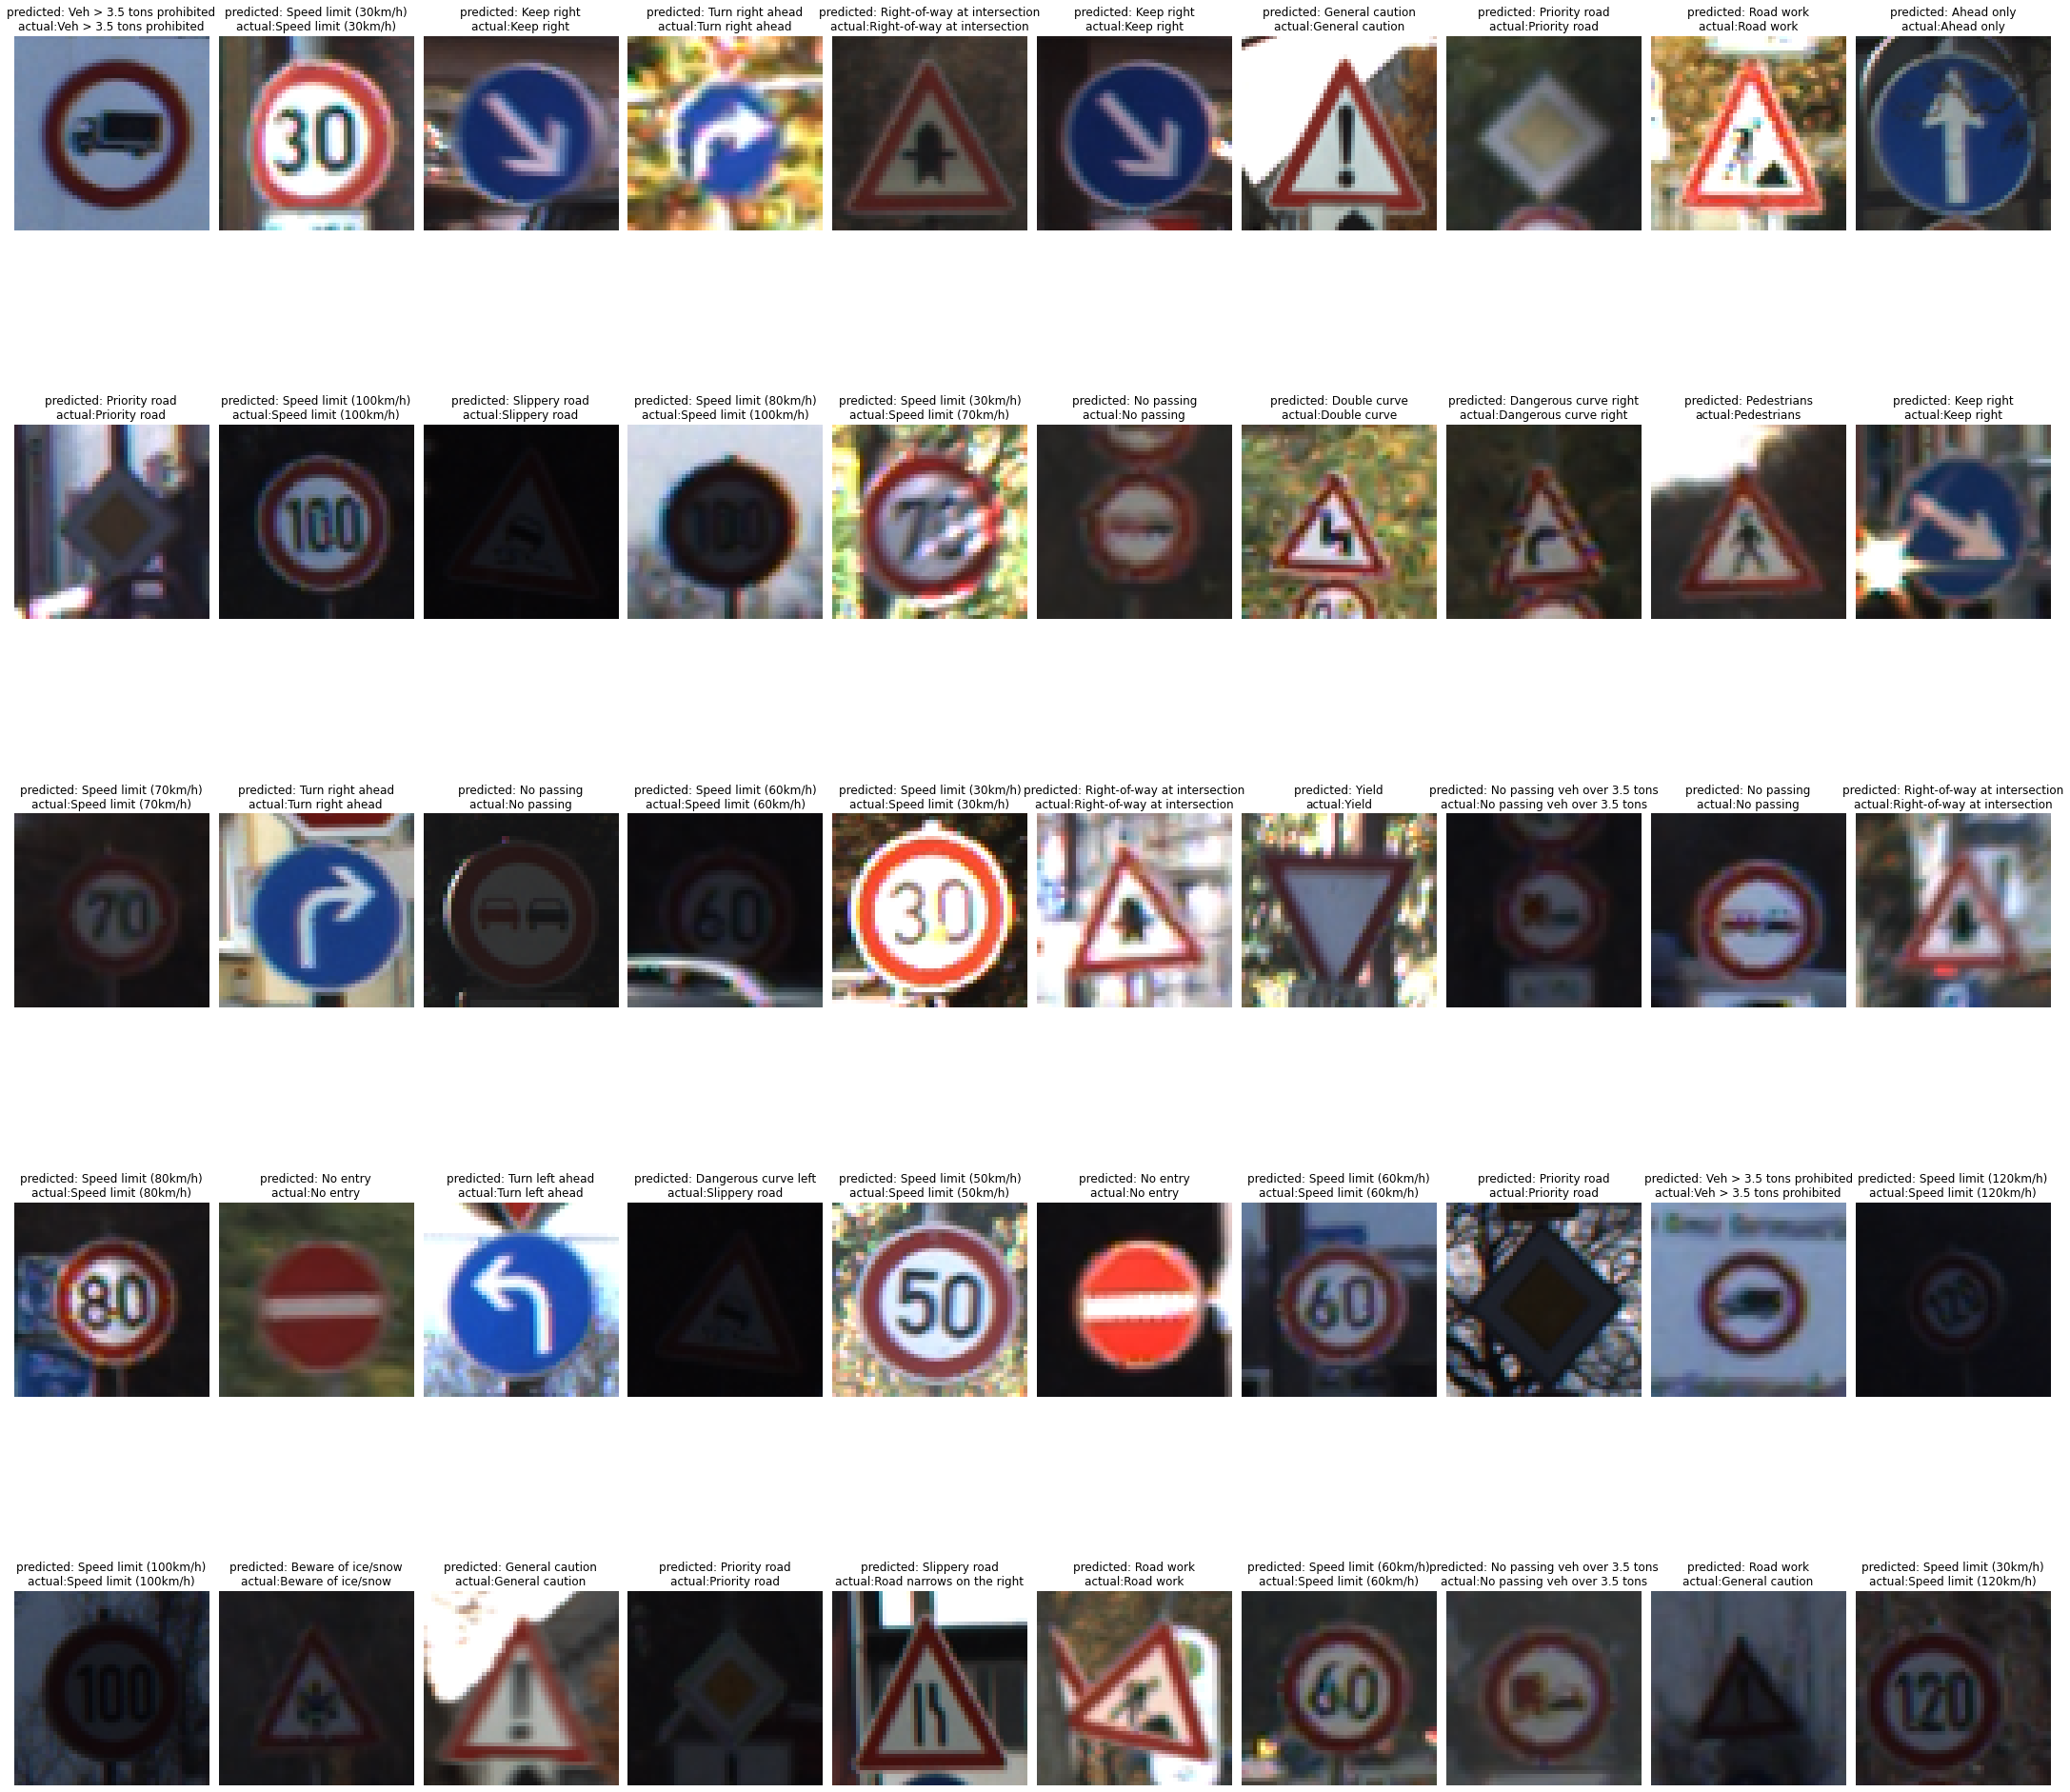

In [52]:
plt.figure(figsize=(30,30))
for i in range(50):
    ax = plt.subplot(5,10,i+1)
    ax.imshow(X_test[i])
    ax.set_title(f'predicted: {classs[pred[i]]}\nactual:{classs[y_test[i]]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [53]:
model.save("./training/TRAFFIC.h5")